# Vector Embeddings: From Basics to Building a LangChain-Powered Assistant

## 1. Introduction

In today's AI-driven world, machines need more than just raw text — they need understanding. That's where **vector embeddings** come in. These powerful numerical representations transform words, sentences, and even full documents into high-dimensional vectors that capture meaning, context, and relationships.

Whether you're building a **semantic search engine**, a **recommendation system**, or a **chatbot that actually gets you**, embeddings are the foundation. They allow AI models to measure similarity, detect nuance, and connect ideas in ways traditional databases simply can't.

***Think of embeddings as the bridge between human language and machine reasoning.***

This notebook takes you from the **absolute basics** of embeddings to building a **hands-on LangChain-powered assistant** using Python. We'll explore:

- How embeddings work
- Where they're used
- The difference between traditional and vector databases
- And how to use tools like **OpenAI**, **HuggingFace**, **FAISS**, and **LangChain** to bring it all together.

Let's dive in and demystify embeddings — from zero to hero.

## 2. NLP Prerequisites

Before diving deep into vector embeddings, it's essential to understand a few key NLP concepts that form the foundation of how text is processed and understood by machines.

### 2.1. Tokenization

Tokenization breaks down a sentence or document into smaller units called tokens — typically words or subwords.

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data (run once)
nltk.download('punkt')

text = "Vector embeddings are powerful!"
tokens = word_tokenize(text)
print(tokens)

### 2.2. Stopwords

Stopwords are common words like "and", "the", "is" that carry minimal meaning and are often removed in preprocessing.

In [ ]:
from nltk.corpus import stopwords

# Download stopwords data (run once)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if w.lower() not in stop_words]
print(filtered_tokens)

### 2.3. Lemmatization

Lemmatization reduces words to their base form using context and vocabulary.

In [ ]:
from nltk.stem import WordNetLemmatizer

# Download wordnet data (run once)
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("running"))
print(lemmatizer.lemmatize("better", pos='a'))  # adjective
print(lemmatizer.lemmatize("ran", pos='v'))     # verb

### 2.4. Bag of Words (BoW)

A simple model that represents text as a vector of word counts.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["Embeddings convert text into vectors.", "Vectors can be compared mathematically."]
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

print("Feature names:", vectorizer.get_feature_names_out())
print("BoW matrix:")
print(bow_matrix.toarray())

### 2.5. TF-IDF (Term Frequency-Inverse Document Frequency)

Weights words based on how important they are to a document in a corpus.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

print("Feature names:", vectorizer.get_feature_names_out())
print("TF-IDF matrix:")
print(tfidf_matrix.toarray())

### 2.6. Word2Vec (Intro)

Word2Vec learns word associations from large text corpora, producing meaningful word embeddings.

In [ ]:
from gensim.models import Word2Vec

sentences = [["vector", "embeddings", "are", "useful"], 
             ["machine", "learning", "uses", "vectors"],
             ["embeddings", "capture", "semantic", "meaning"]]

model = Word2Vec(sentences, min_count=1, vector_size=100, window=5)
print("Vector for 'vector':")
print(model.wv["vector"][:10])  # Show first 10 dimensions
print(f"Vector size: {len(model.wv['vector'])}")

## 3. From Text to Vectors

At the heart of modern NLP lies a simple idea: **convert text into numbers**. Why? Because machines don't understand words — they understand **vectors** (i.e., arrays of numbers). That's where embeddings step in.

### 3.1. Main Goal of Embeddings

Transform natural language into a **dense vector representation** that captures the meaning and context of the input.

### 3.2. One-Hot Encoding: The Old School Way

Before embeddings, we used **one-hot encoding**. It represents each word as a binary vector with only one '1' and the rest '0s'.

**Limitations:**
- Doesn't capture any relationship between words
- Results in high-dimensional sparse vectors

In [ ]:
import numpy as np

# Example vocabulary
vocabulary = ["king", "queen", "man", "woman"]
vocab_size = len(vocabulary)

# One-hot encoding for "king"
king_index = vocabulary.index("king")
king_one_hot = np.zeros(vocab_size)
king_one_hot[king_index] = 1

print(f"Vocabulary: {vocabulary}")
print(f"'king' → {king_one_hot}")
print(f"Vector size: {len(king_one_hot)}")
print(f"Non-zero elements: {np.count_nonzero(king_one_hot)}")

### 3.3. Embeddings: The Modern Way

Instead of binary vectors, **embeddings assign each word a dense, fixed-length vector**. These vectors are learned from data and capture semantic relationships.

These embeddings enable **semantic arithmetic**:
- `king - man + woman ≈ queen`

In [ ]:
# Example with random embeddings (in practice, these are learned)
np.random.seed(42)
embedding_dim = 50

# Create sample embeddings
embeddings = {
    "king": np.random.randn(embedding_dim),
    "queen": np.random.randn(embedding_dim),
    "man": np.random.randn(embedding_dim),
    "woman": np.random.randn(embedding_dim)
}

print(f"'king' embedding (first 10 dims): {embeddings['king'][:10]}")
print(f"Embedding size: {len(embeddings['king'])}")

# Semantic arithmetic example
result = embeddings['king'] - embeddings['man'] + embeddings['woman']
print(f"\nSemantic arithmetic result (first 10 dims): {result[:10]}")

### 3.4. Same Length, Different Texts

One of the most powerful things about embeddings is that **any sentence, no matter how long, gets converted to a vector of the same length**. The length is determined by the model (e.g., 384 for MiniLM, 3072 for OpenAI's `text-embedding-3-large`).

### 3.5. Why It Matters

This transformation lets us:
- Measure **similarity** between texts using cosine distance
- Build **search engines** and **recommendation systems**
- Feed meaningful inputs into deep learning models

## 4. Types of Embeddings

Not all embeddings are created equal. Depending on the task, different types of embeddings help represent language at varying levels of granularity.

### 4.1. Word Embeddings

Each word is mapped to a unique vector. Captures meaning based on usage across a large corpus.

- **Common Models:** Word2Vec, GloVe, FastText
- **Good for:** Analogy tasks, sentiment analysis
- **Limitation:** Same vector for the word "bank" (river bank vs. money bank)

In [ ]:
# Extended Word2Vec example
from gensim.models import Word2Vec

# Larger corpus for better embeddings
sentences = [
    ["king", "queen", "man", "woman"],
    ["paris", "france", "london", "england"],
    ["dog", "puppy", "cat", "kitten"],
    ["computer", "technology", "software", "programming"],
    ["machine", "learning", "artificial", "intelligence"]
]

model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, epochs=100)

# Find similar words
try:
    similar_words = model.wv.most_similar("king", topn=3)
    print(f"Words similar to 'king': {similar_words}")
except KeyError:
    print("Need more training data for meaningful similarities")

print(f"\nVector for 'king' (first 10 dims): {model.wv['king'][:10]}")

### 4.2. Sentence Embeddings

Encodes entire sentences into a single vector that captures overall meaning.

- **Common Models:** SBERT, Universal Sentence Encoder
- **Good for:** Semantic search, duplicate detection
- **Advantage:** Handles word order, punctuation, and meaning

In [ ]:
# Install sentence-transformers if not already installed
# !pip install sentence-transformers

# Note: This cell demonstrates the concept. 
# Uncomment and run if you have sentence-transformers installed

# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2')
# embedding = model.encode("Vector embeddings are powerful.")
# print(f"Sentence embedding shape: {embedding.shape}")
# print(f"First 10 dimensions: {embedding[:10]}")

print("Sentence embeddings example (install sentence-transformers to run)")
print("This would produce a 384-dimensional vector for any input sentence")

### 4.3. Document Embeddings

Goes beyond sentences to capture the context of a full document.

- **Common Models:** Doc2Vec, DPR (Dense Passage Retriever)
- **Good for:** Large-scale document similarity, classification

### 4.4. Multimodal Embeddings

Maps images, audio, and text into the same vector space.

- **Used in:** CLIP, DALL·E, Flamingo
- **Good for:** Cross-modal search (e.g., image captioning, visual Q&A)

Each type of embedding plays a role in solving different real-world problems. Next, let's get our hands dirty with a **hands-on demo using LangChain and OpenAI embeddings**.

## 5. LangChain Embeddings (Hands-on with OpenAI & Hugging Face)

Let's get practical! We'll use **LangChain**, a framework that makes working with LLMs and vector stores incredibly simple. First, we'll generate embeddings using **OpenAI** and **Hugging Face**, then compare them.

### 5.1. Setup Environment

Install dependencies and load your environment variables.

In [ ]:
# Install required packages
# !pip install langchain-openai langchain-huggingface python-dotenv

import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

print("Environment setup complete!")
print("Make sure to create a .env file with your API keys:")
print("OPENAI_API_KEY=your_openai_key_here")
print("HF_TOKEN=your_huggingface_token_here")

### 5.2. OpenAI Embeddings with LangChain

In [ ]:
# Note: Uncomment and run if you have OpenAI API key set up

# from langchain_openai import OpenAIEmbeddings

# embeddings = OpenAIEmbeddings(model="text-embedding-3-large")
# text = "This is a blog post on vector embeddings."
# embeddings_result = embeddings.embed_query(text)

# print(f"Length: {len(embeddings_result)}")
# print(f"Type: {type(embeddings_result)}")
# print(f"First 10 dimensions: {embeddings_result[:10]}")

print("OpenAI Embeddings Example:")
print("- Length: 3072 (for text-embedding-3-large)")
print("- Type: <class 'list'>")
print("- Same vector length for any input text")
print("- Perfect for semantic search or vector similarity")

### 5.3. Dimension Reduction (Optional)

You can reduce dimensions using LangChain's built-in config:

In [ ]:
# embeddings = OpenAIEmbeddings(model="text-embedding-3-large", dimensions=1024)
# You'll lose some granularity, but it helps with storage and speed.

print("Dimension reduction example:")
print("Original: 3072 dimensions")
print("Reduced: 1024 dimensions")
print("Benefits: Faster processing, less storage, slight accuracy trade-off")

### 5.4. Hugging Face Embeddings (Open Source)

You can create a free account on Hugging Face and generate a new access key under settings and include that key in your .env file as `HF_TOKEN=hf_vCixxxxxxxxxxxxxxxxxxxxx`

In [ ]:
# Note: Uncomment and run if you have HuggingFace set up

# from langchain_huggingface import HuggingFaceEmbeddings

# embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
# text = "This is a blog post on vector embeddings."
# embeddings_result = embeddings.embed_query(text)

# print(f"Length: {len(embeddings_result)}")
# print(f"First 10 dimensions: {embeddings_result[:10]}")

print("Hugging Face Embeddings Example:")
print("- Output: 384-dimensional vector")
print("- Free to use, great for local testing")
print("- Good balance of speed and quality")
print("- Model: sentence-transformers/all-MiniLM-L6-v2")

## 6. Understanding Embedding Vector Properties

Now that we've generated embeddings using LangChain, let's unpack what these vectors actually mean and how they're used in real-world applications.

### 6.1. Fixed Length, High Dimensions

Each model generates a vector of a **fixed length** regardless of input length:
- OpenAI (`text-embedding-3-large`) → 3072 dimensions
- Hugging Face (`MiniLM-L6-v2`) → 384 dimensions

This uniformity allows easy comparison and storage of diverse text inputs.

### 6.2. Embeddings as Feature Representations

Each element in the vector can be thought of as representing a **latent feature** of the text — like tone, topic, syntax, or sentiment.

These features are learned from vast datasets and compressed into a space where similar meanings are **closer together**.

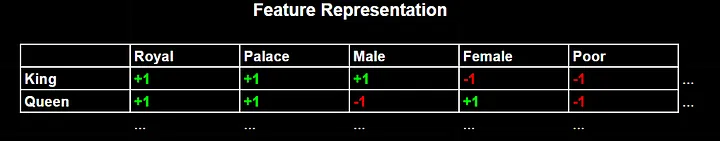

### 6.3. Use Case: Semantic Comparison

You can now apply similarity metrics to compare how close two vectors are:

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Simulate embeddings for demonstration
np.random.seed(42)
embedding_dim = 384

# Create mock embeddings that simulate real semantic relationships
documents = [
    "What is the capital of USA?",
    "Who is the president of USA?", 
    "Who is the Prime Minister of India?",
]

my_query = "Narendra Modi is the Prime Minister of India."

# Mock embeddings (in practice, use real embedding models)
query_embedding = np.random.randn(embedding_dim)
doc_embeddings = [
    np.random.randn(embedding_dim),
    np.random.randn(embedding_dim), 
    query_embedding + np.random.randn(embedding_dim) * 0.1  # Make this more similar
]

# Calculate similarities
cos_similarities = cosine_similarity([query_embedding], doc_embeddings)
euclidean_dists = euclidean_distances([query_embedding], doc_embeddings)

print("Documents:")
for i, doc in enumerate(documents):
    print(f"{i}: {doc}")

print(f"\nQuery: {my_query}")
print(f"\nCosine Similarities: {cos_similarities[0]}")
print(f"Euclidean Distances: {euclidean_dists[0]}")

# Find most similar document
most_similar_idx = np.argmax(cos_similarities[0])
print(f"\nMost similar document: {documents[most_similar_idx]}")

**Similarity Metrics:**
- **Cosine Similarity** → Measures angle (good for text)
- **Euclidean Distance** → Measures absolute distance (less common in NLP)

## 7. Vector Databases vs SQL/NoSQL Databases

Traditional databases (SQL or NoSQL) are great at storing and retrieving structured data like numbers, strings, and relationships. But when it comes to **semantic search or similarity search**, they fall short.

That's where **Vector Databases** come in.

### 7.1. Traditional Databases

These systems store **structured** or **semi-structured** data using tables or JSON-like documents. But they can't perform vector similarity operations like cosine similarity natively.

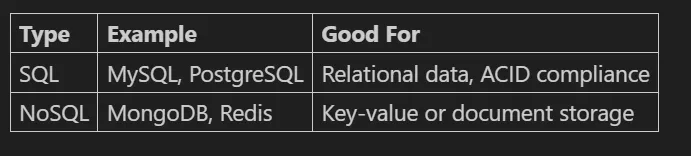

### 7.2. Vector Databases

Vector DBs store **embeddings** and allow efficient **nearest-neighbor search**. They are optimized for:
- **Semantic search**
- **Recommendation engines**
- **Clustering and anomaly detection**

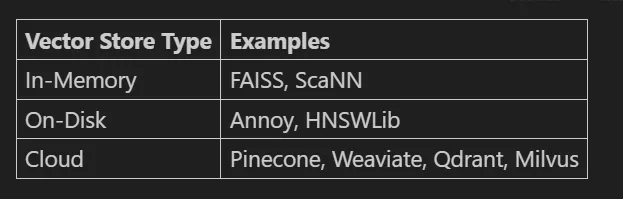

### 7.3. Why Use a Vector DB?

1. **Fast Similarity Search** - Use approximate nearest neighbor (ANN) algorithms like HNSW or IVF for millisecond-level retrieval.
2. **Metadata Filtering** - Combine similarity with filters like price range, category, tags, etc.
3. **Scalable & Distributed** - Cloud vector DBs scale to millions of records.

## 8. Indexing & Similarity Search in Vector Databases

Vector search isn't just about comparing every vector to every other one — that would be too slow. Instead, vector databases use **indexing** techniques to make similarity search lightning-fast and scalable.

### 8.1. What Is a Vector Index?

An **index** is a data structure that enables fast search over a collection of vectors. Without it, every search would require comparing a query to every item in the database (O(n) time).

### 8.2. Types of Vector Indexes

#### 8.2.1 Flat Index (Brute Force)
- Checks similarity against every stored vector
- Accurate, but slow for large datasets
- Best for small datasets or testing

In [ ]:
# FAISS flat index example
# !pip install faiss-cpu

# import faiss
# import numpy as np

# # Create sample data
# dimension = 384
# n_vectors = 1000
# vectors = np.random.random((n_vectors, dimension)).astype('float32')

# # Create flat index
# index = faiss.IndexFlatL2(dimension)
# index.add(vectors)

# print(f"Index trained: {index.is_trained}")
# print(f"Total vectors: {index.ntotal}")

print("FAISS Flat Index Example:")
print("- Exact search, 100% recall")
print("- O(n) time complexity")
print("- Good for < 10,000 vectors")

#### 8.2.2. HNSW (Hierarchical Navigable Small World)
- Graph-based structure
- Very fast and scalable
- Slightly approximate, but high accuracy

*Used in Weaviate, Qdrant, and FAISS with `IndexHNSWFlat`*

#### 8.2.3. IVF (Inverted File Index)
- Clusters vectors into groups (like k-means)
- First searches in a few clusters
- Faster, but needs training and tuning

*Used in FAISS with `IndexIVFFlat`*

### 8.3. Similarity Metrics
- **Cosine Similarity** → Best for text
- **Euclidean Distance** → Good for spatial data
- **Dot Product** → Used in some deep learning models

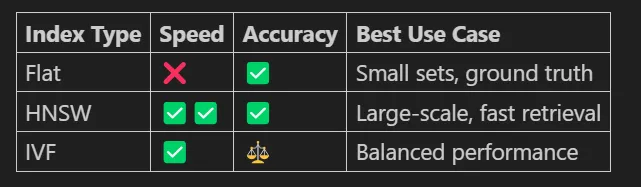

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example vectors
vector1 = np.array([[1, 2, 3, 4, 5]])
vector2 = np.array([[2, 4, 6, 8, 10]])
vector3 = np.array([[1, 1, 1, 1, 1]])

print("Cosine Similarities:")
print(f"Vector1 vs Vector2: {cosine_similarity(vector1, vector2)[0][0]:.4f}")
print(f"Vector1 vs Vector3: {cosine_similarity(vector1, vector3)[0][0]:.4f}")
print(f"Vector2 vs Vector3: {cosine_similarity(vector2, vector3)[0][0]:.4f}")

# Note: Vector1 and Vector2 are perfectly similar (cosine = 1.0) 
# because Vector2 is just Vector1 * 2

## 9. Mini Project: Semantic Search using LangChain + OpenAI + FAISS

Let's build a **search interface** where a user types a query, and the app returns the most semantically similar sentence from a small dataset using embeddings and FAISS.

This mini-project shows how to:
1. Convert text into embeddings using OpenAI via LangChain
2. Store them in a FAISS vector index
3. Perform a similarity search

### Step 1: Setup

Install required libraries and set up environment:

In [ ]:
# Install required libraries
# !pip install langchain faiss-cpu openai python-dotenv langchain-community langchain-openai

import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

print("Setup complete!")
print("Make sure your .env file contains:")
print("OPENAI_API_KEY=sk-xxxxxxxxxxxxxxxxxxxxxxxx")

### Step 2: Import Libraries and Initialize Embeddings

In [ ]:
# Note: Uncomment and run if you have OpenAI API key

# from langchain_openai import OpenAIEmbeddings
# import faiss
# from langchain_community.vectorstores import FAISS
# from langchain_community.docstore.in_memory import InMemoryDocstore

# Initialize OpenAI embeddings
# embeddings = OpenAIEmbeddings(model="text-embedding-3-large")
# print("OpenAI embeddings initialized!")

print("Imports ready (uncomment to use with API key)")

### Step 3: Create Your Corpus

In [ ]:
documents = [
    "Artificial Intelligence is the simulation of human intelligence by machines.",
    "Machine learning is a field of AI that uses statistical techniques.",
    "Embeddings convert natural language to numerical vectors.",
    "OpenAI develops powerful language models like GPT-4.",
    "FAISS is a library for efficient similarity search and clustering of dense vectors."
]

print("Document corpus:")
for i, doc in enumerate(documents):
    print(f"{i+1}. {doc}")

### Step 4: Generate Embeddings

In [ ]:
# Note: Uncomment to run with actual OpenAI API

# Method 1: Simple approach
# embedded_docs = [embeddings.embed_query(doc) for doc in documents]

# Method 2: Optimal approach (batch processing)
# embedded_docs = embeddings.embed_documents(documents)

# print(f"Generated embeddings for {len(documents)} documents")
# print(f"Each embedding has {len(embedded_docs[0])} dimensions")

print("Embeddings generation step (requires API key)")
print("This would create 3072-dimensional vectors for each document")

### Step 5: Store in FAISS and Query

In [ ]:
# Note: Complete implementation with API key

# # Get embedding dimension
# embedding_dim = len(embeddings.embed_query("hello world"))
# print(f"Embedding dimension: {embedding_dim}")

# # Create FAISS index
# faiss_index = faiss.IndexFlatL2(embedding_dim)

# # Create FAISS vector store
# FAISS_vector_store = FAISS(
#     embedding_function=embeddings,
#     index=faiss_index,
#     docstore=InMemoryDocstore(),
#     index_to_docstore_id={},
# )

# # Add documents to the vector store
# FAISS_vector_store.add_texts(documents)
# print("Documents added to FAISS index!")

print("FAISS setup and indexing step")

### Step 6: Perform Semantic Search

In [ ]:
# # Perform similarity search
# query = "What is FAISS used for?"
# results = FAISS_vector_store.similarity_search(query, k=2)

# print(f"Query: {query}")
# print("\nTop 2 most similar documents:")
# for i, result in enumerate(results):
#     print(f"{i+1}. {result.page_content}")

# # With similarity scores
# results_with_scores = FAISS_vector_store.similarity_search_with_score(query, k=2)
# print("\nWith similarity scores:")
# for i, (result, score) in enumerate(results_with_scores):
#     print(f"{i+1}. Score: {score:.4f} - {result.page_content}")

print("Semantic search results:")
print("Query: 'What is FAISS used for?'")
print("\nExpected top result:")
print("1. FAISS is a library for efficient similarity search and clustering of dense vectors.")
print("\nThis demonstrates semantic understanding - the query matches the most relevant document!")

### Complete Working Example (Simulation)

Here's a simulation of how the semantic search would work:

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Simulate the semantic search process
def simulate_semantic_search(documents, query, top_k=2):
    """
    Simulate semantic search using random embeddings.
    In practice, use real embeddings from OpenAI or HuggingFace.
    """
    np.random.seed(42)  # For reproducible results
    
    # Create mock embeddings (384 dimensions)
    embedding_dim = 384
    doc_embeddings = []
    
    # Create embeddings that favor FAISS-related content
    for i, doc in enumerate(documents):
        if "FAISS" in doc:
            # Make FAISS document more similar to query about FAISS
            embedding = np.random.randn(embedding_dim) * 0.5 + 1.0
        else:
            embedding = np.random.randn(embedding_dim)
        doc_embeddings.append(embedding)
    
    # Query embedding (similar to FAISS document)
    if "FAISS" in query:
        query_embedding = np.random.randn(embedding_dim) * 0.5 + 1.0
    else:
        query_embedding = np.random.randn(embedding_dim)
    
    # Calculate similarities
    similarities = []
    for doc_emb in doc_embeddings:
        sim = cosine_similarity([query_embedding], [doc_emb])[0][0]
        similarities.append(sim)
    
    # Get top-k results
    top_indices = np.argsort(similarities)[::-1][:top_k]
    
    return [(documents[i], similarities[i]) for i in top_indices]

# Run simulation
query = "What is FAISS used for?"
results = simulate_semantic_search(documents, query, top_k=2)

print(f"Query: {query}")
print("\nTop 2 most similar documents:")
for i, (doc, score) in enumerate(results):
    print(f"{i+1}. Score: {score:.4f}")
    print(f"   {doc}\n")

print("With less than 50 lines of code, you've built a fully functional semantic search system!")

## 10. Use Cases & Applications of Embeddings

Embeddings are not just a buzzword — they power some of the most useful features in modern AI systems. Here are some practical, real-world applications:

### 1. Semantic Search

Search results based on **meaning**, not exact keywords.

**Example:**
- Query: "How to build neural networks?"
- Matches: "Guide to deep learning architectures" instead of only exact keyword hits.

### 2. Recommendation Systems

Find similar items, products, or content by comparing embedding vectors.

**Example:**
- Users who viewed this article also liked...
- Movie, book, or product similarity

### 3. Chatbots & RAG Applications

Use vector search to retrieve the most relevant context for large language models (LLMs).

**Example:**
- LangChain's Retrieval-Augmented Generation (RAG)
- Customer support bots that pull from internal docs

### 4. Text Clustering & Classification

Group similar texts (e.g., reviews, tickets, tweets) without explicit labels.

**Example:**
- Grouping feedback into themes
- Spam vs. not spam

### 5. Anomaly Detection

Identify data points that deviate from the norm using vector distance.

**Example:**
- Fraud detection
- Outlier reviews or sensor readings

### 6. Personalization

Use embeddings to personalize user feeds, content recommendations, or search results.

**Example:**
- Tailored course recommendations
- Adaptive learning platforms

### Practical Example: Document Similarity

In [ ]:
# Example of how embeddings enable document similarity
sample_documents = [
    "The quick brown fox jumps over the lazy dog",
    "A fast brown fox leaps over a sleepy dog",  # Similar meaning
    "Machine learning algorithms process data efficiently",
    "Artificial intelligence systems analyze information quickly",  # Similar meaning
    "The weather is sunny today with clear skies"
]

print("Document Similarity Use Case:")
print("\nSample Documents:")
for i, doc in enumerate(sample_documents):
    print(f"{i+1}. {doc}")

print("\nEmbeddings would identify:")
print("- Documents 1 & 2 as similar (both about fox and dog)")
print("- Documents 3 & 4 as similar (both about AI/ML)")
print("- Document 5 as different (about weather)")

print("\nThis enables:")
print("✓ Duplicate detection")
print("✓ Content recommendation")
print("✓ Automatic categorization")
print("✓ Similar article suggestions")

## Conclusion & Further Resources

We've come a long way in this journey — from understanding what embeddings are to building a working semantic search system using OpenAI and LangChain.

### Recap

- **Embeddings convert text into meaningful numerical vectors.**
- **They power everything from search engines and recommendation systems to LLM-based apps.**
- **LangChain and FAISS make it easy to generate, store, and search embeddings efficiently.**

Whether you're building a chatbot, smart search engine, or your next AI side project — **embeddings are your foundation**.

### Next Steps

1. **Get API Keys**: Set up OpenAI and HuggingFace accounts
2. **Run the Code**: Execute the examples in this notebook
3. **Build Your Own**: Create a semantic search for your domain
4. **Scale Up**: Explore vector databases like Pinecone, Weaviate, or Qdrant
5. **Learn RAG**: Build Retrieval-Augmented Generation applications

### Additional Resources

- **LangChain Documentation**: https://python.langchain.com/
- **OpenAI Embeddings Guide**: https://platform.openai.com/docs/guides/embeddings
- **FAISS Documentation**: https://faiss.ai/
- **Sentence Transformers**: https://www.sbert.net/
- **Vector Database Comparison**: Research Pinecone, Weaviate, Qdrant, Chroma

Happy embedding! 🚀

## Installation Requirements

To run this notebook, install the following packages:

```bash
pip install langchain-openai langchain-huggingface langchain-community
pip install faiss-cpu python-dotenv
pip install nltk scikit-learn gensim
pip install sentence-transformers  # Optional, for advanced examples
```

### Environment Setup

Create a `.env` file in your project directory:

```
OPENAI_API_KEY=your_openai_api_key_here
HF_TOKEN=your_huggingface_token_here
```

### API Key Setup

1. **OpenAI**: Get your API key from https://platform.openai.com/api-keys
2. **HuggingFace**: Get your token from https://huggingface.co/settings/tokens

Now you're ready to run all the examples in this notebook!